<a href="https://colab.research.google.com/github/abhiskp/Time-Series-Analysis-and-Forecasting/blob/main/Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:


from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/abhiskp/Time-Series-Analysis-and-Forecasting/main/coimbatore_2k_final.csv')
df.head(10)

,longitude,latitude
0,76.96292,10.85913
1,76.96898,10.86515
2,76.97412,10.86712
3,76.97384,10.86967
4,76.97903,10.87520
5,77.00087,10.88597
6,76.99979,10.89609
7,76.99398,10.89500
8,76.99112,10.89206
9,77.00072,10.98628


In [4]:
df.tail(10)

,longitude,latitude
2341,76.92991,10.93393
2342,76.94405,10.94913
2343,76.93725,10.94796
2344,76.92841,10.94963
2345,76.92963,10.95383
2346,76.93492,10.94734
2347,76.93048,10.95249
2348,76.93404,10.95027
2349,76.93019,10.95258
2350,76.93430,10.94833


In [5]:
df.shape


(2351, 2)

In [6]:
print(df.describe())

         longitude     latitude
count  2351.000000  2351.000000
mean     76.950730    10.990126
std       0.050908     0.056007
min      76.721080    10.812330
25%      76.920365    10.954005
50%      76.949710    11.005890
75%      76.969450    11.024190
max      77.211130    11.243560


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

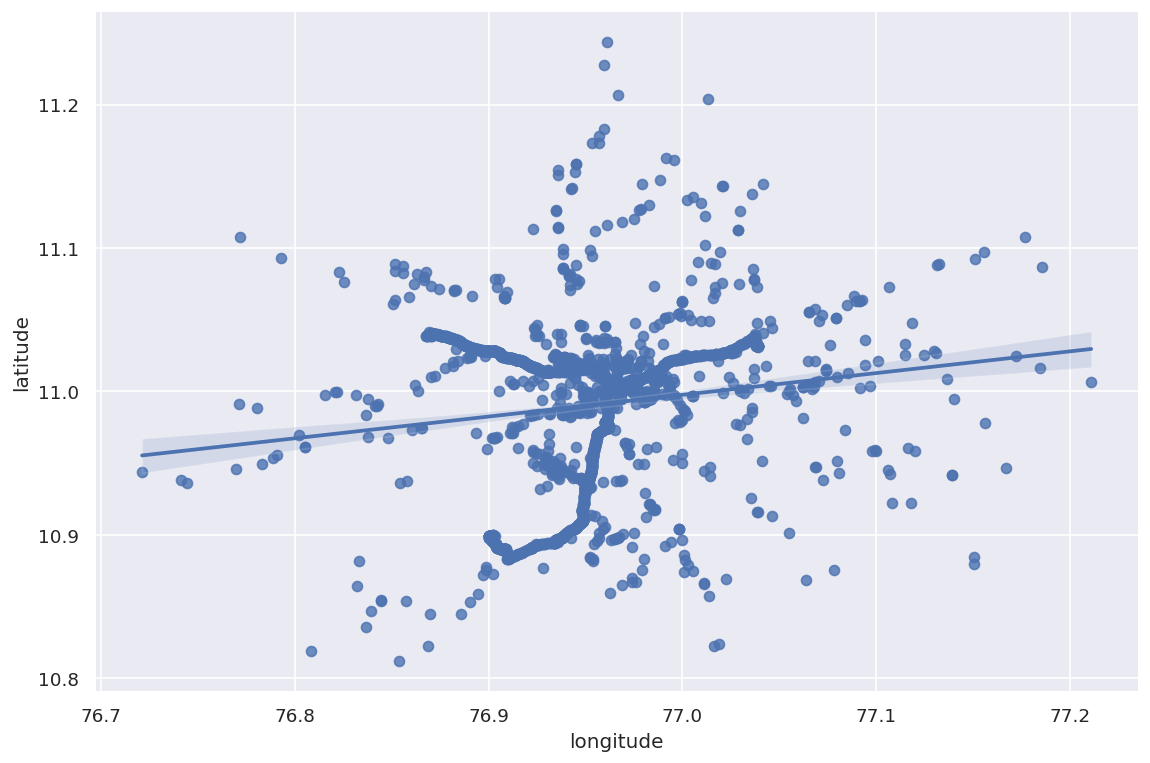

In [8]:
sns.set_theme(color_codes=True)
sns.regplot(x="longitude", y="latitude", data=df);

Linear Regression 

In [9]:
y = df['latitude'].values.reshape(-1, 1)
X = df['longitude'].values.reshape(-1, 1)

In [10]:
print(X.shape) 
print(X) 

(2351, 1)
[[76.96292]
 [76.96898]
 [76.97412]
 ...
 [76.93404]
 [76.93019]
 [76.9343 ]]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)

[0.33858235]


In [14]:
print(regressor.coef_)

[[0.13843179]]


**EQUATION **

latitude = 0.13843179*longitude + 0.33858235

***Predictions->***

In [15]:
def calc(slope, intercept, longit):
    return slope*longit+intercept

score = calc(regressor.coef_, regressor.intercept_,76.96292)
print(score)

[[10.9926973]]


In [16]:
score = regressor.predict([[76.96292]])
print(score)

[[10.9926973]]


In [17]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual  Predicted
0    10.89011  10.984837
1    11.03996  10.987469
2    10.92256  10.990784
3    11.07100  10.989840
4    10.90895  10.990649
..        ...        ...
466  10.89052  10.984744
467  10.99810  10.995797
468  11.02472  11.021661
469  11.03892  10.980561
470  10.97390  10.992278

[471 rows x 2 columns]


In [18]:
error =  pd.DataFrame({'Error':(y_test.squeeze()-y_pred.squeeze())})

In [19]:
print(error)

        Error
0   -0.094727
1    0.052491
2   -0.068224
3    0.081160
4   -0.081699
..        ...
466 -0.094224
467  0.002303
468  0.003059
469  0.058359
470 -0.018378

[471 rows x 1 columns]


*

***Calculating the error in prediction->***


*

In [20]:
mae = mean_absolute_error(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [21]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.04
Mean squared error: 0.00
Root mean squared error: 0.06




# *Spliting the DataSet*

In [22]:
new = []
for i,item in enumerate(np.array_split(df,25)):
  new.append(item)

In [39]:

nw=pd.DataFrame(new[0])
print(nw)

    longitude  latitude
0    76.96292  10.85913
1    76.96898  10.86515
2    76.97412  10.86712
3    76.97384  10.86967
4    76.97903  10.87520
..        ...       ...
90   76.94975  10.93289
91   76.94971  10.93175
92   76.95225  10.93232
93   76.95268  10.93362
94   76.95919  10.93660

[95 rows x 2 columns]


In [75]:
def regrr(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  print(f"{regressor.coef_}{'*(latitude)  +  '}{regressor.intercept_}".replace('[','').replace(']',''))
  print()
  # df_coef_intercep = pd.DataFrame({'coeff':regressor.coef_, 'interc': regressor.intercept_})
  # return(coeff)


Coefficient and interception of all 25 splits are calclated seperately

In [76]:
for i in range(25):
  nw=pd.DataFrame(new[i])
  y = nw['latitude'].values.reshape(-1, 1)
  X = nw['longitude'].values.reshape(-1, 1)
  res=regrr(X,y)
  #equation of all 25 splits

0.26541926*(latitude)  +  -9.45962045

0.11987175*(latitude)  +  1.75292177

0.83320123*(latitude)  +  -53.14215092

0.44941846*(latitude)  +  -23.57922014

-0.09673655*(latitude)  +  18.42333756

0.16113999*(latitude)  +  -1.36353395

0.05824188*(latitude)  +  6.54176736

-0.21372469*(latitude)  +  27.4760318

-0.27585965*(latitude)  +  32.24754698

-0.25453514*(latitude)  +  30.60149384

0.29300091*(latitude)  +  -11.52443833

-0.46336182*(latitude)  +  46.66099903

-0.34234157*(latitude)  +  37.35418576

-0.60807704*(latitude)  +  57.78637359

-0.30351979*(latitude)  +  34.3716651

0.3062055*(latitude)  +  -12.56284313

0.29566497*(latitude)  +  -11.74448504

0.20512734*(latitude)  +  -4.77090236

2.12574958*(latitude)  +  -152.60541854

1.58048648*(latitude)  +  -110.65902648

6.79171761*(latitude)  +  -511.69511533

7.25610635*(latitude)  +  -547.42979077

0.74690297*(latitude)  +  -46.56642592

-0.00394607*(latitude)  +  11.19249937

1.52344023*(latitude)  +  -106.25749431



In [83]:
def predd(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  k1=y_test.squeeze()
  k2=y_pred.squeeze()
  error =  pd.DataFrame({'Error':k1-k2})
  df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze(),'Error':k1-k2})
  print(df_preds)

In [84]:
for i in range(25):
  nw=pd.DataFrame(new[i])
  y = nw['latitude'].values.reshape(-1, 1)
  X = nw['longitude'].values.reshape(-1, 1)
  res=predd(X,y)

      Actual  Predicted     Error
0   11.00452  10.969968  0.034552
1   11.00267  10.970282  0.032388
2   10.89760  10.962356 -0.064756
3   10.90398  10.966805 -0.062825
4   10.85913  10.967821 -0.108691
5   11.00333  10.970013  0.033317
6   10.98914  10.968317  0.020823
7   11.00149  10.967710  0.033780
8   11.00345  10.975993  0.027457
9   11.03879  10.972222  0.066568
10  11.00310  10.969915  0.033185
11  10.88290  10.953847 -0.070947
12  11.02653  10.983348  0.043182
13  11.06248  10.977573  0.084907
14  11.01089  10.975470  0.035420
15  10.87520  10.972097 -0.096897
16  11.02557  10.978180  0.047390
17  11.00485  10.970279  0.034571
18  10.98969  10.967362  0.022328
      Actual  Predicted     Error
0   11.00132  10.979321  0.021999
1   10.99904  10.979213  0.019827
2   10.94455  10.975751 -0.031201
3   10.95261  10.977476 -0.024866
4   10.93785  10.978950 -0.041100
5   11.00103  10.979873  0.021157
6   11.00232  10.979238  0.023082
7   10.93930  10.976807 -0.037507
8   10.99453  

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

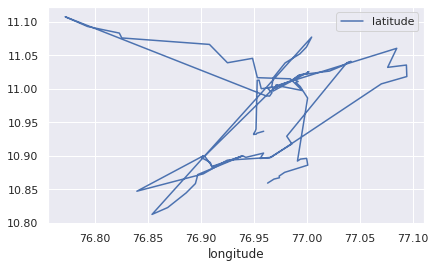

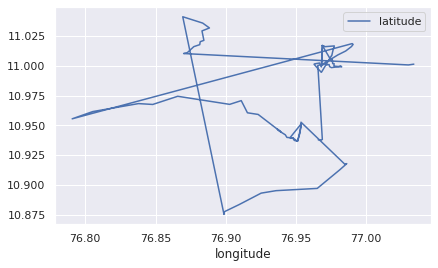

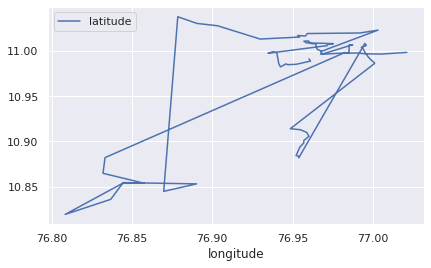

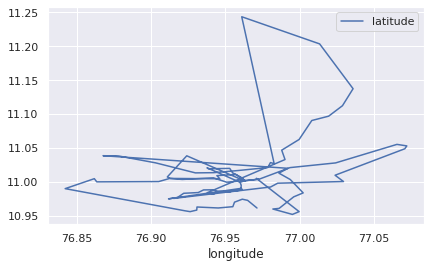

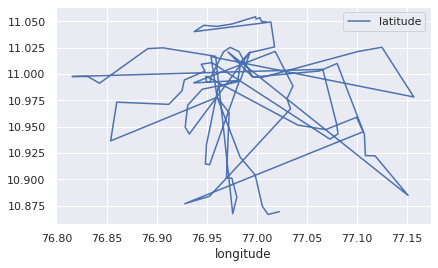

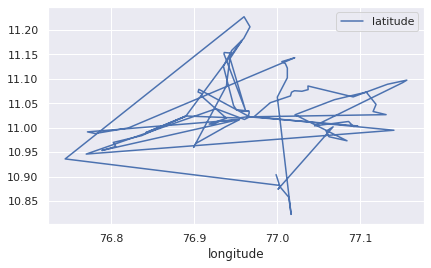

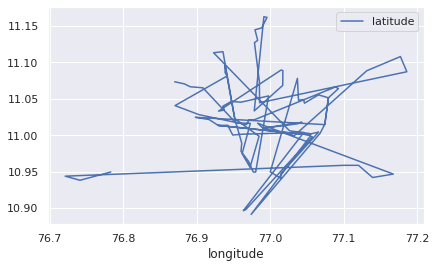

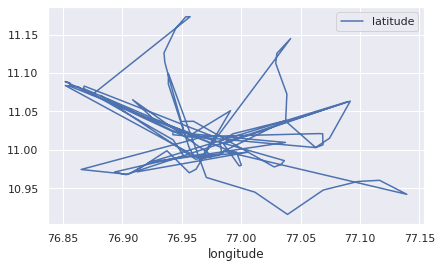

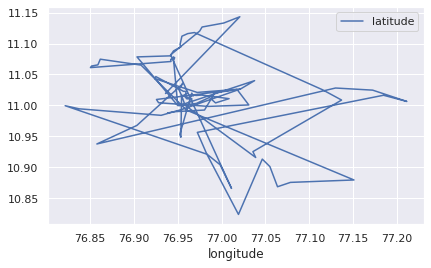

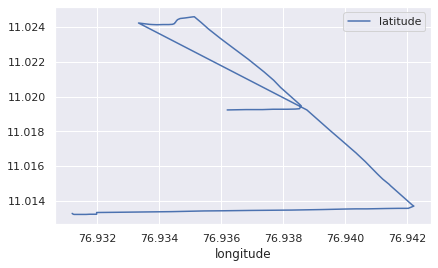

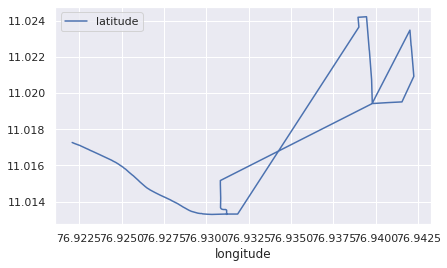

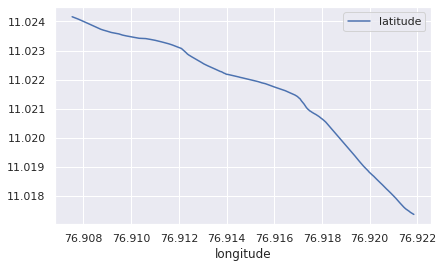

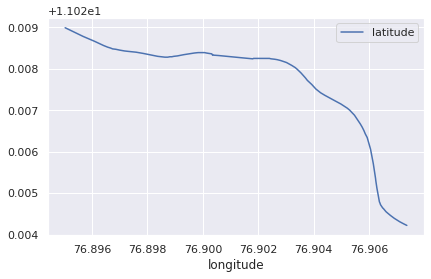

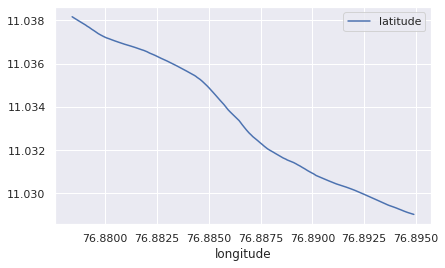

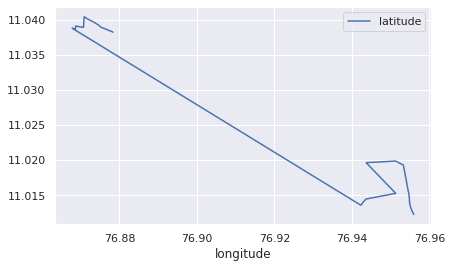

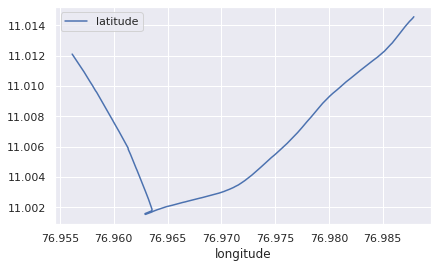

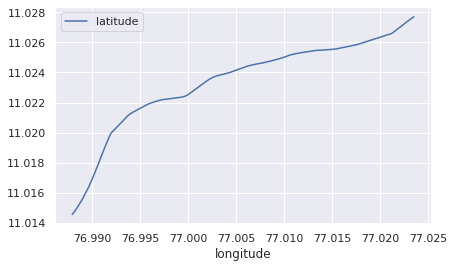

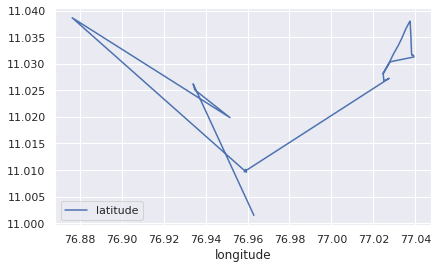

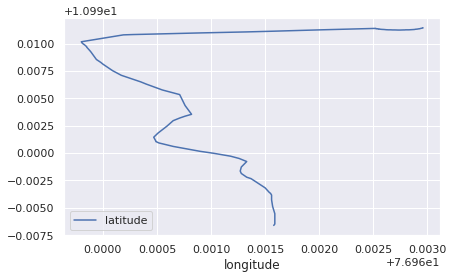

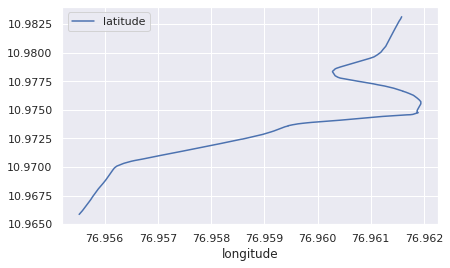

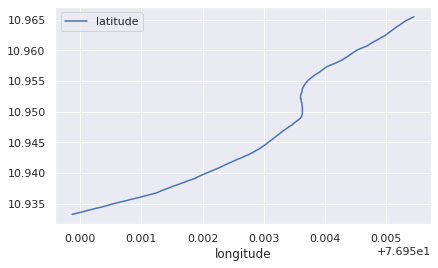

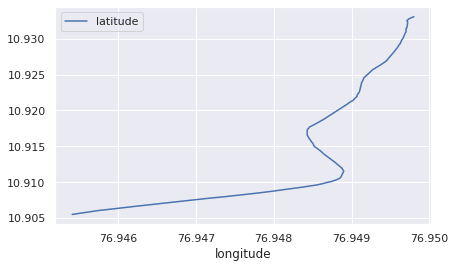

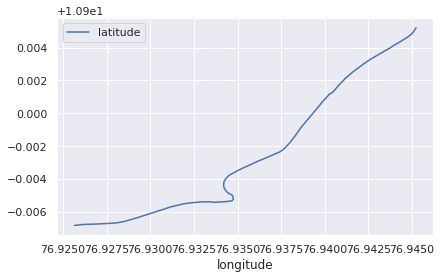

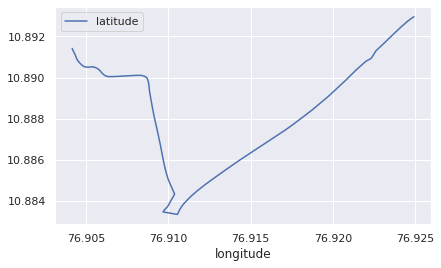

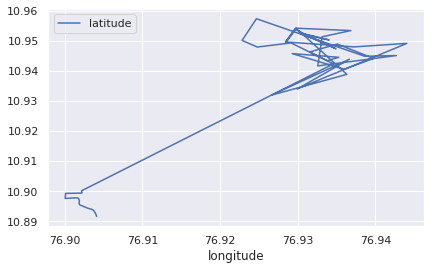

In [95]:
for i in range(25):
  new[i].plot.line(x='longitude', y='latitude')